In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
roses = list(data_dir.glob('roses/*'))

In [7]:
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

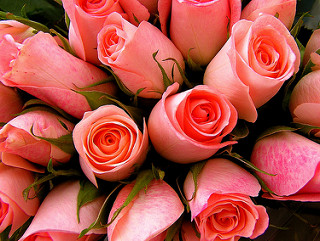

In [8]:
PIL.Image.open(str(roses[8]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
X = []
y = []

In [12]:
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        reshaped = cv2.resize(img , (224,224))
        X.append(reshaped)
        y.append(flowers_labels_dict[flower_name])

(<matplotlib.image.AxesImage at 0x1e5e44b0ee0>, 0)

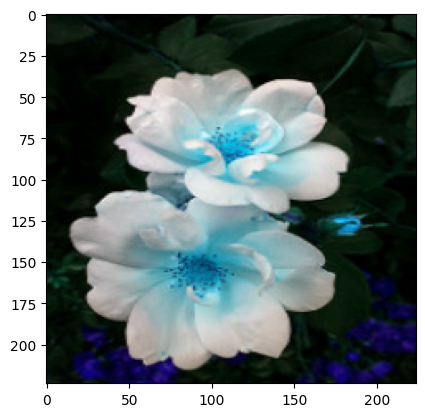

In [13]:
plt.imshow(X[0]) , y[0]

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X = X/255

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test ,  y_train , y_test = train_test_split(X , y  , test_size =0.33)

In [17]:
X_train.shape

(2458, 224, 224, 3)

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu"  ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5) #  activation= linear
    ])
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train , epochs=20)

Epoch 1/20
77/77 [==============================] - 10s 125ms/step - loss: 1.9006 - acc: 0.2486
Epoch 2/20
77/77 [==============================] - 8s 103ms/step - loss: 1.4069 - acc: 0.4333
Epoch 3/20
77/77 [==============================] - 8s 101ms/step - loss: 1.2180 - acc: 0.5090
Epoch 4/20
77/77 [==============================] - 8s 101ms/step - loss: 1.0400 - acc: 0.6054
Epoch 5/20
77/77 [==============================] - 8s 102ms/step - loss: 0.9079 - acc: 0.6465
Epoch 6/20
77/77 [==============================] - 8s 101ms/step - loss: 0.7865 - acc: 0.7034
Epoch 7/20
77/77 [==============================] - 8s 102ms/step - loss: 0.6833 - acc: 0.7417
Epoch 8/20
77/77 [==============================] - 8s 102ms/step - loss: 0.6212 - acc: 0.7701
Epoch 9/20
77/77 [==============================] - 8s 102ms/step - loss: 0.4975 - acc: 0.8173
Epoch 10/20
77/77 [==============================] - 8s 102ms/step - loss: 0.4323 - acc: 0.8438
Epoch 11/20
77/77 [=============================

In [47]:
import gc
gc.collect()

50221

In [20]:
hub.__version__

'0.14.0'

In [26]:
pretrained_model_without_top = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224,224,3),
trainable=False)

In [27]:
model = keras.Sequential([
    pretrained_model_without_top,
    keras.layers.Dense(5)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train , epochs=5)

Epoch 1/5
77/77 [==============================] - 23s 300ms/step - loss: 0.2607 - acc: 0.9142
Epoch 2/5
77/77 [==============================] - 25s 320ms/step - loss: 0.2042 - acc: 0.9430
Epoch 3/5
77/77 [==============================] - 63s 814ms/step - loss: 0.1836 - acc: 0.9471
Epoch 4/5
77/77 [==============================] - 236s 3s/step - loss: 0.1544 - acc: 0.9626
Epoch 5/5
77/77 [==============================] - 23s 299ms/step - loss: 0.1338 - acc: 0.9703


In [38]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 6s 163ms/step - loss: 0.3824 - acc: 0.8663


[0.38238537311553955, 0.8663366436958313]

In [42]:
model.save("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [46]:
y_predict = model.predict(np.array([X_test[0]]))

In [30]:
np.argmax(y_predict[1])

0